# Support Vector Machine

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

In [7]:
df = pd.read_csv('../Dataset/card-transaction-dataset.csv')

In [9]:
cl0 = df[df['Class'] == 0]
cl1 = df[df['Class'] == 1]

Text(0, 0.5, 'Amount')

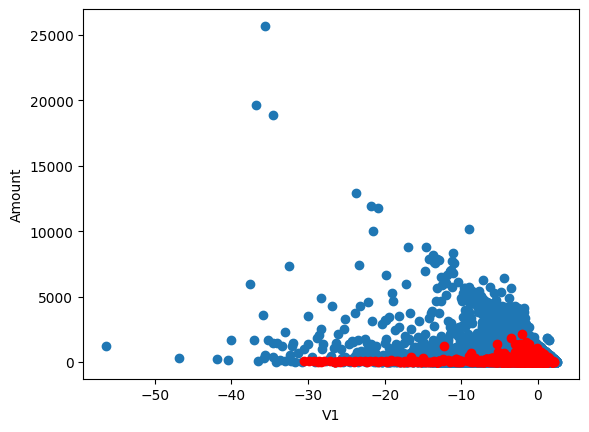

In [14]:
plt.scatter(cl0['V1'],cl0['Amount'])
plt.scatter(cl1['V1'],cl1['Amount'],color='red')
plt.xlabel('V1')
plt.ylabel('Amount')

In [20]:
Y = df['Class']
X = df.drop(['Class'],axis='columns')
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=6)
len(X_test)

In [24]:
classifier = SVC()
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

0.9982795547909132

In [25]:
classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train,Y_train)
classifier_linear.score(X_test,Y_test)

0.9988237772550121

In [29]:
# logarithmic loss
Y_pred = classifier.predict(X_test)

print("Log loss :",log_loss(Y_test,Y_pred))

Log loss : 0.04239536492873954


[[56854    10]
 [   57    41]]
Precission : [0.99899844 0.80392157]
Recall : [0.99982414 0.41836735]
F1-score : [0.99941112 0.55033557]


<Axes: >

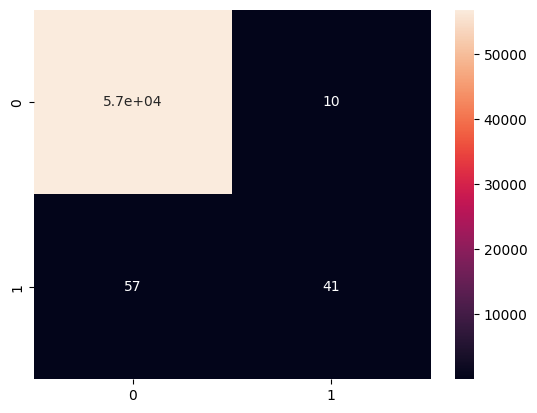

In [28]:
# create the confusion matrix
cf = confusion_matrix(Y_test,Y_pred)
print(cf)
precision,recall,fscore,_ = precision_recall_fscore_support(Y_test,Y_pred)
print("Precission :",precision)
print("Recall :",recall)
print("F1-score :",fscore)
sns.heatmap(cf,annot=True)